## Load necessary libraries

In [1]:
using ChaosTools
using DifferentialEquations
using Plots
using LinearAlgebra
using Plots.PlotMeasures
using LaTeXStrings
using JLD2
using NPZ
using Distributions
using DynamicalSystems

In [2]:
include("Network.jl")

Main.Network

# $\epsilon = 5$

In [12]:
@load "eps_5_LyapunovNetwork.jld2" matrix vector_eps vectorIext_e

3-element Vector{Symbol}:
 :matrix
 :vector_eps
 :vectorIext_e

In [13]:
matrix05 = deepcopy(matrix)
vector_eps05 = deepcopy(vector_eps)
vectorIext_e05 = deepcopy(vectorIext_e)

0.0:0.1:16.0

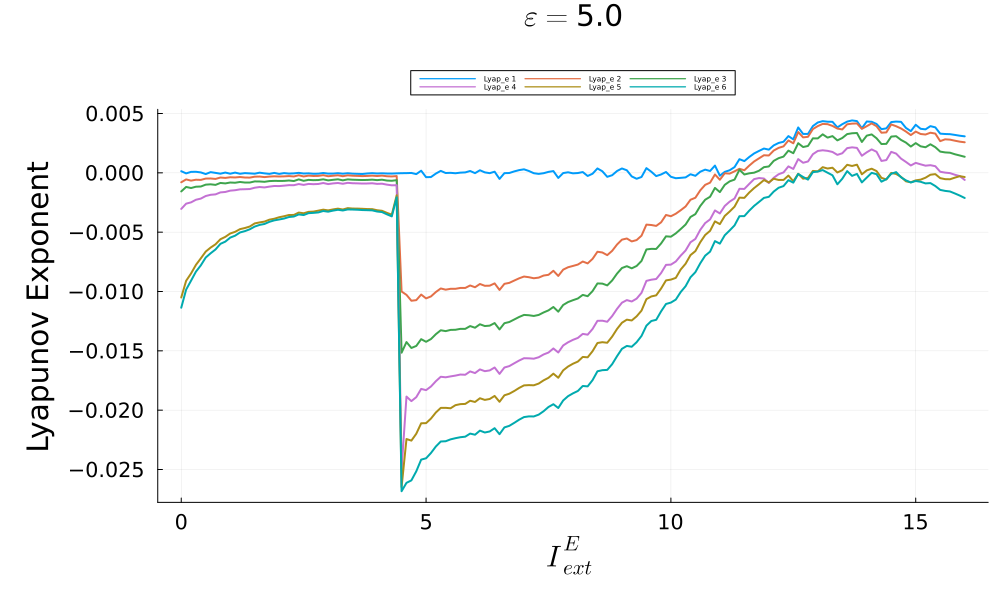

In [17]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    plot!(vectorIext_e05,[matrix05[j][i] for j in 1:length(vectorIext_e05)], label="Lyap_e $i",linewidth=2,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(vector_eps05[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Lyapunov Exponent",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [32]:
tol = 4e-4
modif_matrix05 = deepcopy(matrix05)
for idx_eps=1:length(vector_eps05)
    for idx_Iext_e=1:length(vectorIext_e05)
        for lyap_e =1:90*6
            if abs(matrix05[idx_eps,idx_Iext_e][lyap_e])<tol
                modif_matrix05[idx_eps,idx_Iext_e][lyap_e]=0
            end
        end
    end
end

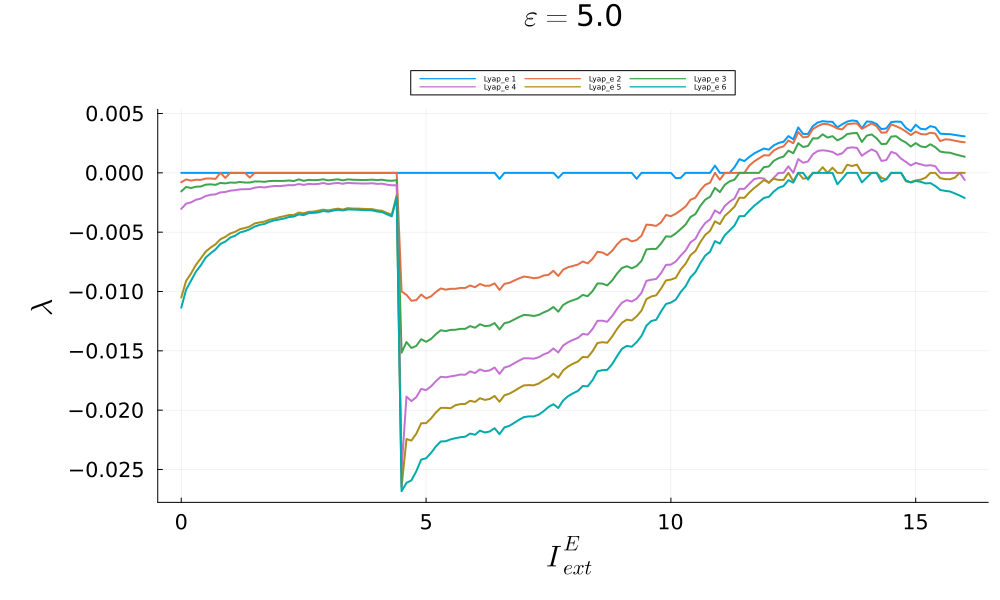

In [33]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    plot!(vectorIext_e05,[modif_matrix05[j][i] for j in 1:length(vectorIext_e05)], label="Lyap_e $i",linewidth=2,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(vector_eps05[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"\lambda",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [34]:
# Extract the first element from each MVector to create a 2D matrix
Lyapunov_1_05 = [modif_matrix05[i, j][1] for i in 1:length(vector_eps05), j in 1:length(vectorIext_e05)]
Lyapunov_2_05 = [modif_matrix05[i, j][2] for i in 1:length(vector_eps05), j in 1:length(vectorIext_e05)]
Lyapunov_3_05 = [modif_matrix05[i, j][3] for i in 1:length(vector_eps05), j in 1:length(vectorIext_e05)]
Lyapunov_4_05 = [modif_matrix05[i, j][4] for i in 1:length(vector_eps05), j in 1:length(vectorIext_e05)]
Lyapunov_5_05 = [modif_matrix05[i, j][5] for i in 1:length(vector_eps05), j in 1:length(vectorIext_e05)]
Lyapunov_6_05 = [modif_matrix05[i, j][6] for i in 1:length(vector_eps05), j in 1:length(vectorIext_e05)]

1×161 Matrix{Float64}:
 -0.0113677  -0.00984099  -0.00909188  …  -0.00191625  -0.00211873

In [35]:
# Initialize a matrix to save the classification of the system based on Lyapunov expnents
state_classif_05 = Matrix{Float64}(undef, length(vector_eps05), length(vectorIext_e05))
for idx_eps=1:length(vector_eps05)
    for idx_Iext_e=1:length(vectorIext_e05)
        if Lyapunov_1_05[idx_eps,idx_Iext_e]==0 && Lyapunov_2_05[idx_eps,idx_Iext_e]==0
            # State Classification ==> 3 (Quasiperiodic dynamics)
            state_classif_05[idx_eps,idx_Iext_e] = 3
        elseif Lyapunov_1_05[idx_eps,idx_Iext_e]==0 && Lyapunov_2_05[idx_eps,idx_Iext_e]<0
            # State Classification ==> 2 (Periodic dynamics)
            state_classif_05[idx_eps,idx_Iext_e] = 2
        elseif Lyapunov_1_05[idx_eps,idx_Iext_e]<0 && Lyapunov_2_05[idx_eps,idx_Iext_e]<0
            # State Classification ==> 1 (Fixed point)
            state_classif_05[idx_eps,idx_Iext_e] = 1
        elseif Lyapunov_1_05[idx_eps,idx_Iext_e]>0 && (Lyapunov_2_05[idx_eps,idx_Iext_e]<=0)
            # State Classification ==> 4 (Chaotic dynamics)
            state_classif_05[idx_eps,idx_Iext_e] = 4
        elseif Lyapunov_1_05[idx_eps,idx_Iext_e]>0 && Lyapunov_2_05[idx_eps,idx_Iext_e]>0
            # State Classification ==> 5 (Hyperchaos)
            state_classif_05[idx_eps,idx_Iext_e] = 5
        end
    end
end

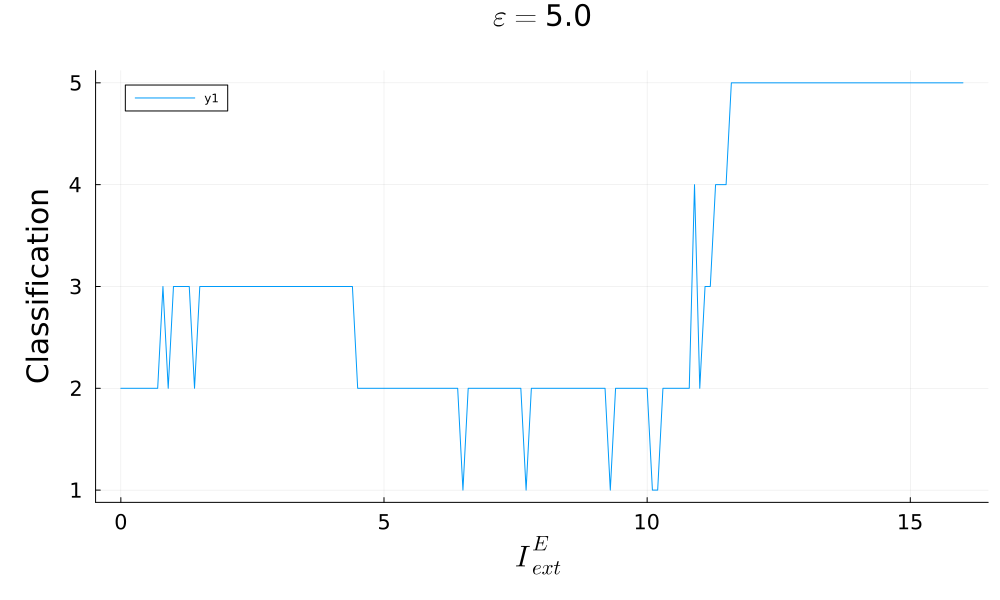

In [37]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
plot!(vectorIext_e05,state_classif_05[1,:],markersize=3,markerstrokewidth=0)

# Set title
plot!(title=L"\epsilon = " * string(vector_eps05[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Classification",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
#plot!(legend=:outertop, legendfontsize=5,legendcolumns=1)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [56]:
# Initialize a matrix to save the fractal dimension based on Lyapunov expnents
fractal_dim_05 = Matrix{Float64}(undef, length(vector_eps05), length(vectorIext_e05))
entropy_05 = Matrix{Float64}(undef, length(vector_eps05), length(vectorIext_e05))
for idx_eps=1:length(vector_eps05)
    for idx_Iext_e=1:length(vectorIext_e05)
        if modif_matrix05[idx_eps,idx_Iext_e][1]<0
            fractal_dim_05[idx_eps,idx_Iext_e]=0
        else
            # Compute cumulative sum of LyapunovExponents vector
            cum_sum = cumsum(modif_matrix05[idx_eps,idx_Iext_e])

            # Find index of the first element that is greater than zero in the cumulative sum
            index = findfirst(x -> x < 0, cum_sum)
            #println(index)

            # Check if all are negative
            #if index == nothing

            #end

            # Compute numerador in Kaplan-Yorke formula
            num = sum(modif_matrix05[idx_eps,idx_Iext_e][1:index-1])
            #println(num)

            # Save entropy as number of Lyap exp positive
            entropy_05[idx_eps,idx_Iext_e] = index-1

            # Compute denominator in the Kaplan-Yorke formula
            den = abs(modif_matrix05[idx_eps,idx_Iext_e][index])

            # Save dimension of current pair using Kaplan-Yorke formula
            fractal_dim_05[idx_eps,idx_Iext_e] = (index-1)+num/den
        end

    end
end

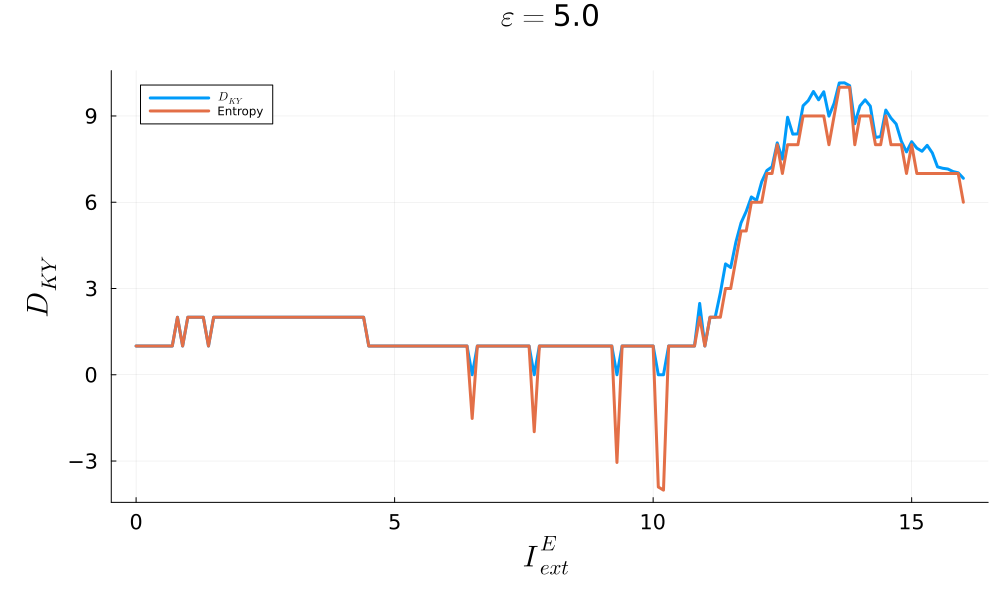

In [58]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
plot!(vectorIext_e05,fractal_dim_05[1,:],label=L"D_{KY}",linewidth=3,markerstrokewidth=0)
plot!(vectorIext_e05,entropy_05[1,:],label = "Entropy",linewidth=3,markerstrokewidth=0)

# Set title
plot!(title=L"\epsilon = " * string(vector_eps05[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"D_{KY}",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
#plot!(legend=:outertop, legendfontsize=5,legendcolumns=1)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

# $\epsilon = 9$

In [40]:
@load "Def_eps_9_LyapunovNetwork.jld2" matrix vector_eps vectorIext_e

3-element Vector{Symbol}:
 :matrix
 :vector_eps
 :vectorIext_e

In [41]:
matrix09 = deepcopy(matrix)
vector_eps09 = deepcopy(vector_eps)
vectorIext_e09 = deepcopy(vectorIext_e)

0.0:0.1:16.0

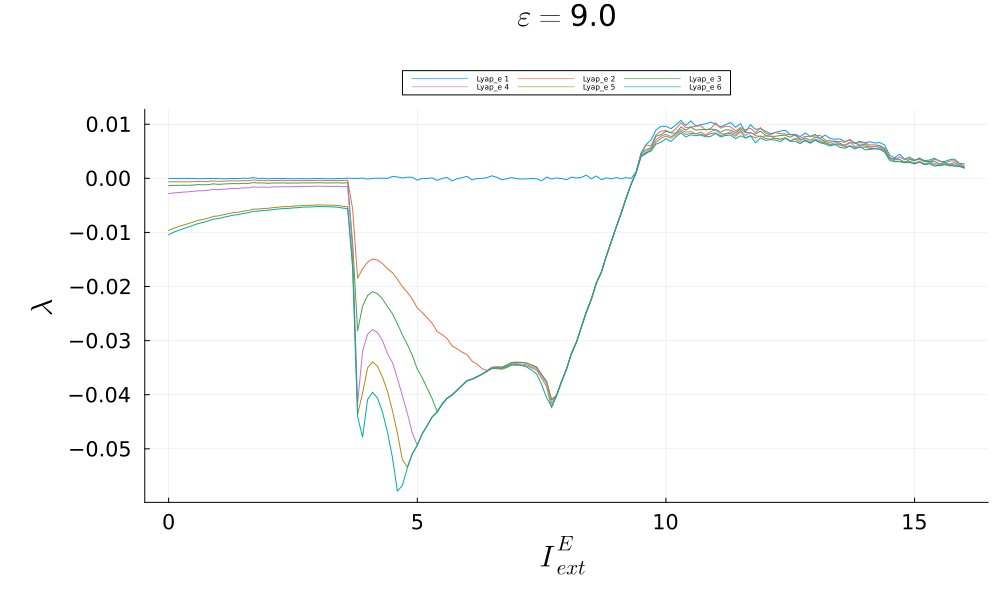

In [42]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    plot!(vectorIext_e09,[matrix09[j][i] for j in 1:length(vectorIext_e09)], label="Lyap_e $i",markersize=3,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(vector_eps09[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"\lambda",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [43]:
tol = 1e-3
modif_matrix09 = copy(matrix09)
for idx_eps=1:length(vector_eps09)
    for idx_Iext_e=1:length(vectorIext_e09)
        for lyap_e =1:90*6
            if abs(matrix09[idx_eps,idx_Iext_e][lyap_e])<tol
                modif_matrix09[idx_eps,idx_Iext_e][lyap_e]=0
            end
        end
    end
end

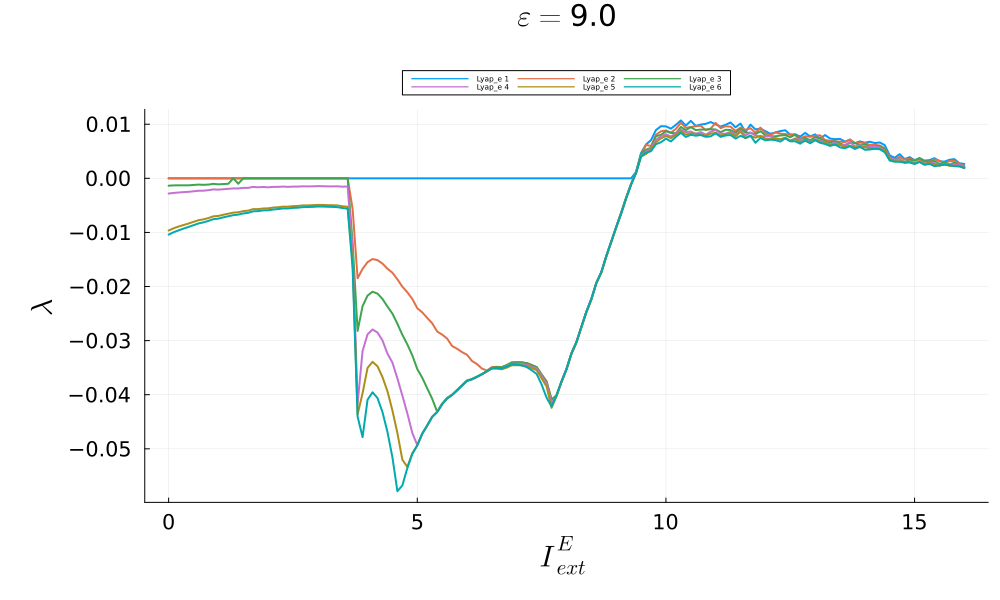

In [44]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    plot!(vectorIext_e09,[matrix09[j][i] for j in 1:length(vectorIext_e09)], label="Lyap_e $i",linewidth=2,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(vector_eps09[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"\lambda",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [45]:
# Extract the first element from each MVector to create a 2D matrix
Lyapunov_1_09 = [modif_matrix09[i, j][1] for i in 1:length(vector_eps09), j in 1:length(vectorIext_e09)]
Lyapunov_2_09 = [modif_matrix09[i, j][2] for i in 1:length(vector_eps09), j in 1:length(vectorIext_e09)]
Lyapunov_3_09 = [modif_matrix09[i, j][3] for i in 1:length(vector_eps09), j in 1:length(vectorIext_e09)]
Lyapunov_4_09 = [modif_matrix09[i, j][4] for i in 1:length(vector_eps09), j in 1:length(vectorIext_e09)]
Lyapunov_5_09 = [modif_matrix09[i, j][5] for i in 1:length(vector_eps09), j in 1:length(vectorIext_e09)]
Lyapunov_6_09 = [modif_matrix09[i, j][6] for i in 1:length(vector_eps09), j in 1:length(vectorIext_e09)]

1×161 Matrix{Float64}:
 -0.0104115  -0.00996635  -0.00962416  …  0.00224586  0.00218996  0.00191889

In [46]:
# Initialize a matrix to save the classification of the system based on Lyapunov expnents
state_classif_09 = Matrix{Float64}(undef, length(vector_eps09), length(vectorIext_e09))
for idx_eps=1:length(vector_eps09)
    for idx_Iext_e=1:length(vectorIext_e09)
        if Lyapunov_1_09[idx_eps,idx_Iext_e]==0 && Lyapunov_2_09[idx_eps,idx_Iext_e]==0
            # State Classification ==> 3 (Quasiperiodic dynamics)
            state_classif_09[idx_eps,idx_Iext_e] = 3
        elseif Lyapunov_1_09[idx_eps,idx_Iext_e]==0 && Lyapunov_2_09[idx_eps,idx_Iext_e]<0
            # State Classification ==> 2 (Periodic dynamics)
            state_classif_09[idx_eps,idx_Iext_e] = 2
        elseif Lyapunov_1_09[idx_eps,idx_Iext_e]<0 && Lyapunov_2_09[idx_eps,idx_Iext_e]<0
            # State Classification ==> 1 (Fixed point)
            state_classif_09[idx_eps,idx_Iext_e] = 1
        elseif Lyapunov_1_09[idx_eps,idx_Iext_e]>0 && (Lyapunov_2_09[idx_eps,idx_Iext_e]<=0)
            # State Classification ==> 4 (Chaotic dynamics)
            state_classif_09[idx_eps,idx_Iext_e] = 4
        elseif Lyapunov_1_09[idx_eps,idx_Iext_e]>0 && Lyapunov_2_09[idx_eps,idx_Iext_e]>0
            # State Classification ==> 5 (Hyperchaos)
            state_classif_09[idx_eps,idx_Iext_e] = 5
        end
    end
end

In [47]:
size(state_classif_09)

(1, 161)

In [48]:
state_classif_09[1,:]

161-element Vector{Float64}:
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 ⋮
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0

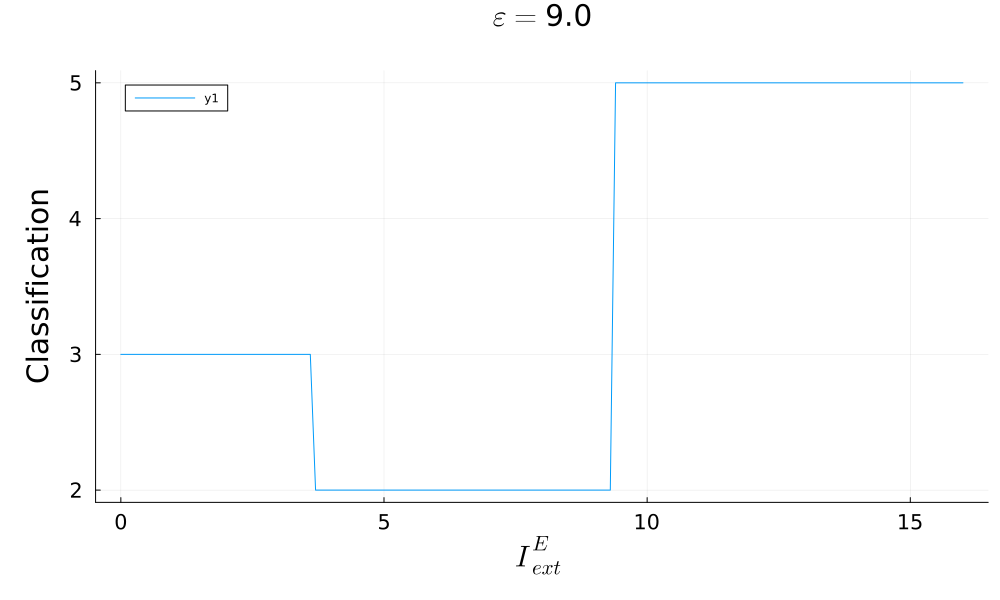

In [49]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
plot!(vectorIext_e09,state_classif_09[1,:],markersize=3,markerstrokewidth=0)

# Set title
plot!(title=L"\epsilon = " * string(vector_eps09[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Classification",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
#plot!(legend=:outertop, legendfontsize=5,legendcolumns=1)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [60]:
# Initialize a matrix to save the fractal dimension based on Lyapunov expnents
fractal_dim_09 = Matrix{Float64}(undef, length(vector_eps09), length(vectorIext_e09))
entropy_09 = Matrix{Float64}(undef, length(vector_eps09), length(vectorIext_e09))
for idx_eps=1:length(vector_eps09)
    for idx_Iext_e=1:length(vectorIext_e09)
        if modif_matrix09[idx_eps,idx_Iext_e][1]<0
            fractal_dim_09[idx_eps,idx_Iext_e]=0
        else
            # Compute cumulative sum of LyapunovExponents vector
            cum_sum = cumsum(modif_matrix09[idx_eps,idx_Iext_e])

            # Find index of the first element that is greater than zero in the cumulative sum
            index = findfirst(x -> x < 0, cum_sum)

            # Check if all are negative
            #if index == nothing

            #end

            # Compute numerador in Kaplan-Yorke formula
            num = sum(modif_matrix09[idx_eps,idx_Iext_e][1:index-1])

            # Save entropy as number of Lyap exp positive
            entropy_09[idx_eps,idx_Iext_e] = index-1
            

            # Compute denominator in the Kaplan-Yorke formula
            den = abs(modif_matrix09[idx_eps,idx_Iext_e][index])

            # Save dimension of current pair using Kaplan-Yorke formula
            fractal_dim_09[idx_eps,idx_Iext_e] = (index-1)+num/den
        end

    end
end

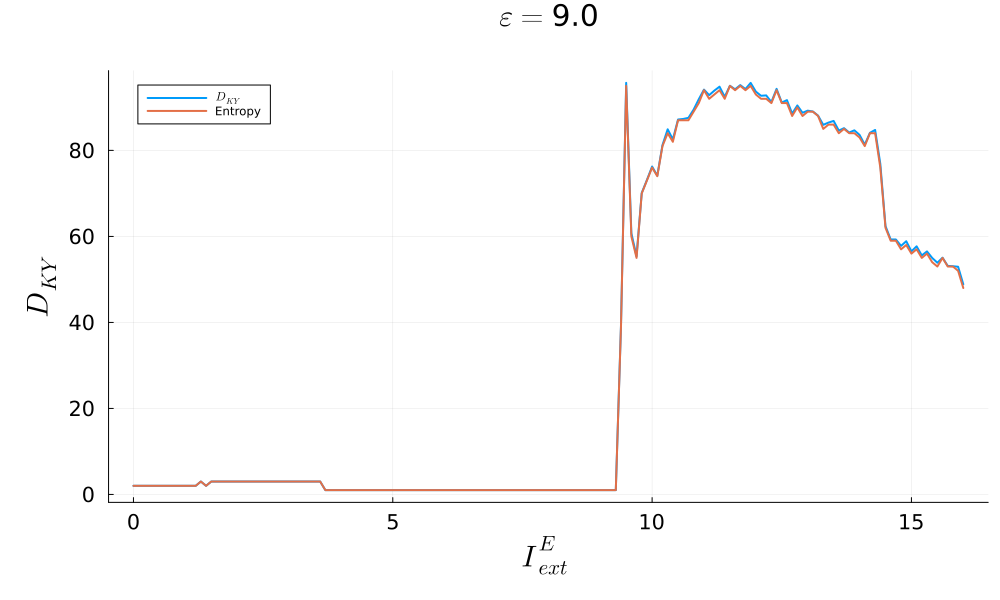

In [62]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
plot!(vectorIext_e09,fractal_dim_09[1,:],label=L"D_{KY}",linewidth=2,markerstrokewidth=0)
plot!(vectorIext_e09,entropy_09[1,:],label = "Entropy",linewidth=2,markerstrokewidth=0)

# Set title
plot!(title=L"\epsilon = " * string(vector_eps09[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"D_{KY}",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
#plot!(legend=:outertop, legendfontsize=5,legendcolumns=1)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

# $\epsilon = 12$

In [63]:
@load "eps_12_LyapunovNetwork.jld2" matrix vector_eps vectorIext_e

3-element Vector{Symbol}:
 :matrix
 :vector_eps
 :vectorIext_e

In [67]:
matrix12 = deepcopy(matrix)
vector_eps12 = deepcopy(vector_eps)
vectorIext_e12 = deepcopy(vectorIext_e)

0.0:0.1:16.0

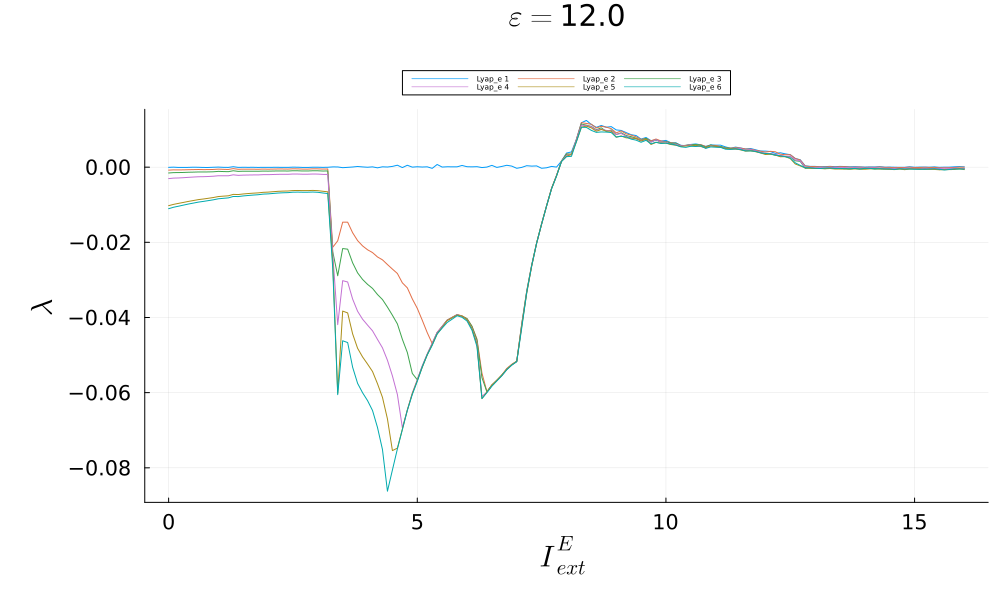

In [68]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    plot!(vectorIext_e012,[matrix012[j][i] for j in 1:length(vectorIext_e012)], label="Lyap_e $i",markersize=3,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(vector_eps012[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"\lambda",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [69]:
tol = 1e-3
modif_matrix12 = copy(matrix12)
for idx_eps=1:length(vector_eps12)
    for idx_Iext_e=1:length(vectorIext_e12)
        for lyap_e =1:90*6
            if abs(matrix12[idx_eps,idx_Iext_e][lyap_e])<tol
                modif_matrix12[idx_eps,idx_Iext_e][lyap_e]=0
            end
        end
    end
end

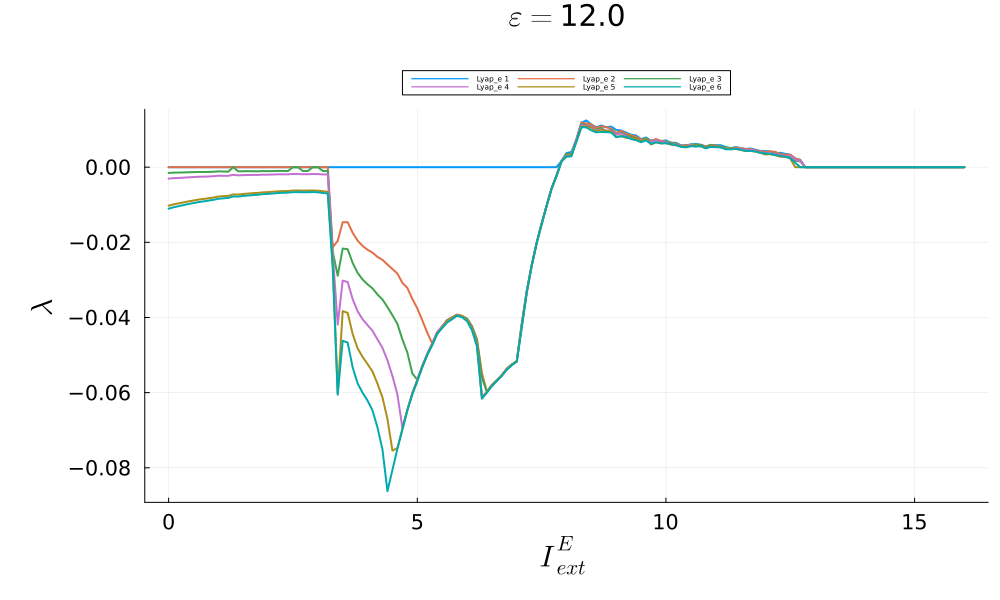

In [70]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    plot!(vectorIext_e12,[matrix12[j][i] for j in 1:length(vectorIext_e12)], label="Lyap_e $i",linewidth=2,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(vector_eps12[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"\lambda",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [71]:
# Extract the first element from each MVector to create a 2D matrix
Lyapunov_1_12 = [modif_matrix12[i, j][1] for i in 1:length(vector_eps12), j in 1:length(vectorIext_e12)]
Lyapunov_2_12 = [modif_matrix12[i, j][2] for i in 1:length(vector_eps12), j in 1:length(vectorIext_e12)]
Lyapunov_3_12 = [modif_matrix12[i, j][3] for i in 1:length(vector_eps12), j in 1:length(vectorIext_e12)]
Lyapunov_4_12 = [modif_matrix12[i, j][4] for i in 1:length(vector_eps12), j in 1:length(vectorIext_e12)]
Lyapunov_5_12 = [modif_matrix12[i, j][5] for i in 1:length(vector_eps12), j in 1:length(vectorIext_e12)]
Lyapunov_6_12 = [modif_matrix12[i, j][6] for i in 1:length(vector_eps12), j in 1:length(vectorIext_e12)]

1×161 Matrix{Float64}:
 -0.0110511  -0.0106613  -0.0103846  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [72]:
# Initialize a matrix to save the classification of the system based on Lyapunov expnents
state_classif_12 = Matrix{Float64}(undef, length(vector_eps12), length(vectorIext_e12))
for idx_eps=1:length(vector_eps12)
    for idx_Iext_e=1:length(vectorIext_e12)
        if Lyapunov_1_12[idx_eps,idx_Iext_e]==0 && Lyapunov_2_12[idx_eps,idx_Iext_e]==0
            # State Classification ==> 3 (Quasiperiodic dynamics)
            state_classif_12[idx_eps,idx_Iext_e] = 3
        elseif Lyapunov_1_12[idx_eps,idx_Iext_e]==0 && Lyapunov_2_12[idx_eps,idx_Iext_e]<0
            # State Classification ==> 2 (Periodic dynamics)
            state_classif_12[idx_eps,idx_Iext_e] = 2
        elseif Lyapunov_1_12[idx_eps,idx_Iext_e]<0 && Lyapunov_2_12[idx_eps,idx_Iext_e]<0
            # State Classification ==> 1 (Fixed point)
            state_classif_12[idx_eps,idx_Iext_e] = 1
        elseif Lyapunov_1_12[idx_eps,idx_Iext_e]>0 && (Lyapunov_2_12[idx_eps,idx_Iext_e]<=0)
            # State Classification ==> 4 (Chaotic dynamics)
            state_classif_12[idx_eps,idx_Iext_e] = 4
        elseif Lyapunov_1_12[idx_eps,idx_Iext_e]>0 && Lyapunov_2_12[idx_eps,idx_Iext_e]>0
            # State Classification ==> 5 (Hyperchaos)
            state_classif_12[idx_eps,idx_Iext_e] = 5
        end
    end
end

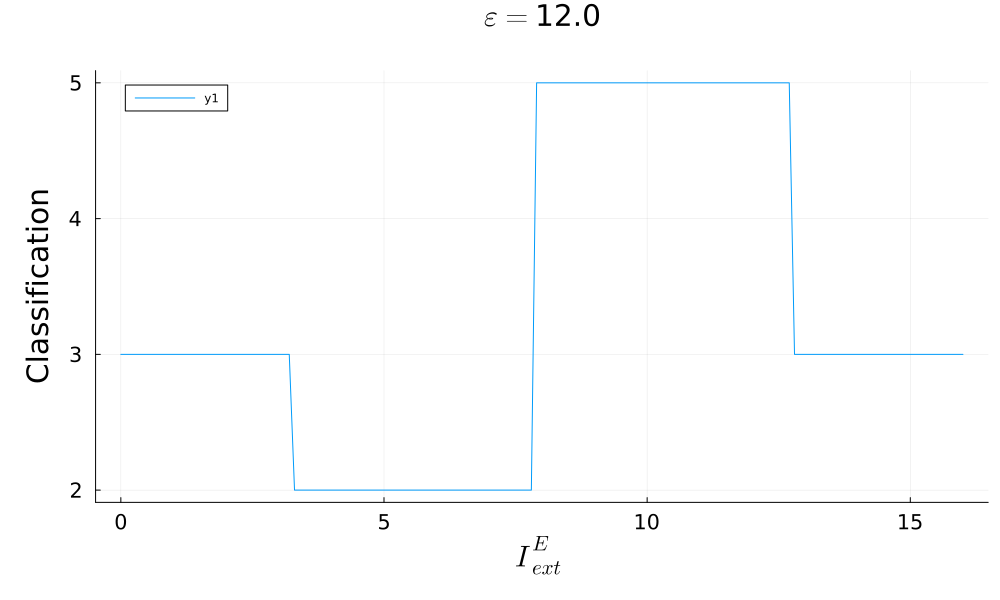

In [73]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
plot!(vectorIext_e12,state_classif_12[1,:],markersize=3,markerstrokewidth=0)

# Set title
plot!(title=L"\epsilon = " * string(vector_eps12[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Classification",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
#plot!(legend=:outertop, legendfontsize=5,legendcolumns=1)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [74]:
# Initialize a matrix to save the fractal dimension based on Lyapunov expnents
fractal_dim_12 = Matrix{Float64}(undef, length(vector_eps12), length(vectorIext_e12))
entropy_12 = Matrix{Float64}(undef, length(vector_eps12), length(vectorIext_e12))
for idx_eps=1:length(vector_eps12)
    for idx_Iext_e=1:length(vectorIext_e12)
        if modif_matrix12[idx_eps,idx_Iext_e][1]<0
            fractal_dim_12[idx_eps,idx_Iext_e]=0
        else
            # Compute cumulative sum of LyapunovExponents vector
            cum_sum = cumsum(modif_matrix12[idx_eps,idx_Iext_e])

            # Find index of the first element that is greater than zero in the cumulative sum
            index = findfirst(x -> x < 0, cum_sum)

            # Check if all are negative
            #if index == nothing

            #end

            # Compute numerador in Kaplan-Yorke formula
            num = sum(modif_matrix12[idx_eps,idx_Iext_e][1:index-1])

            # Save entropy_12
            entropy_12[idx_eps,idx_Iext_e] = (index-1)

            # Compute denominator in the Kaplan-Yorke formula
            den = abs(modif_matrix12[idx_eps,idx_Iext_e][index])

            # Save dimension of current pair using Kaplan-Yorke formula
            fractal_dim_12[idx_eps,idx_Iext_e] = (index-1)+num/den
        end

    end
end

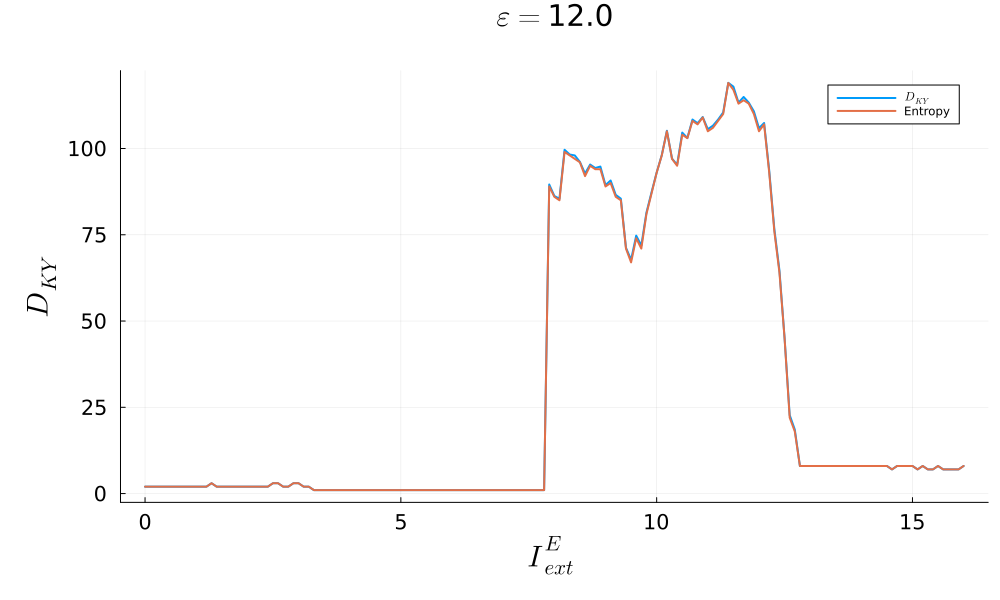

In [75]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
plot!(vectorIext_e12,fractal_dim_12[1,:],label=L"D_{KY}",linewidth=2,markerstrokewidth=0)
plot!(vectorIext_e12,entropy_12[1,:],label="Entropy",linewidth=2,markerstrokewidth=0)
# Set title
plot!(title=L"\epsilon = " * string(vector_eps12[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"D_{KY}",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
#plot!(legend=:outertop, legendfontsize=5,legendcolumns=1)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

# $\epsilon = 20$

In [88]:
@load "eps_20_LyapunovNetwork.jld2" matrix vector_eps vectorIext_e

3-element Vector{Symbol}:
 :matrix
 :vector_eps
 :vectorIext_e

In [89]:
matrix20 = deepcopy(matrix)
vector_eps20 = deepcopy(vector_eps)
vectorIext_e20 = deepcopy(vectorIext_e)

0.0:0.1:16.0

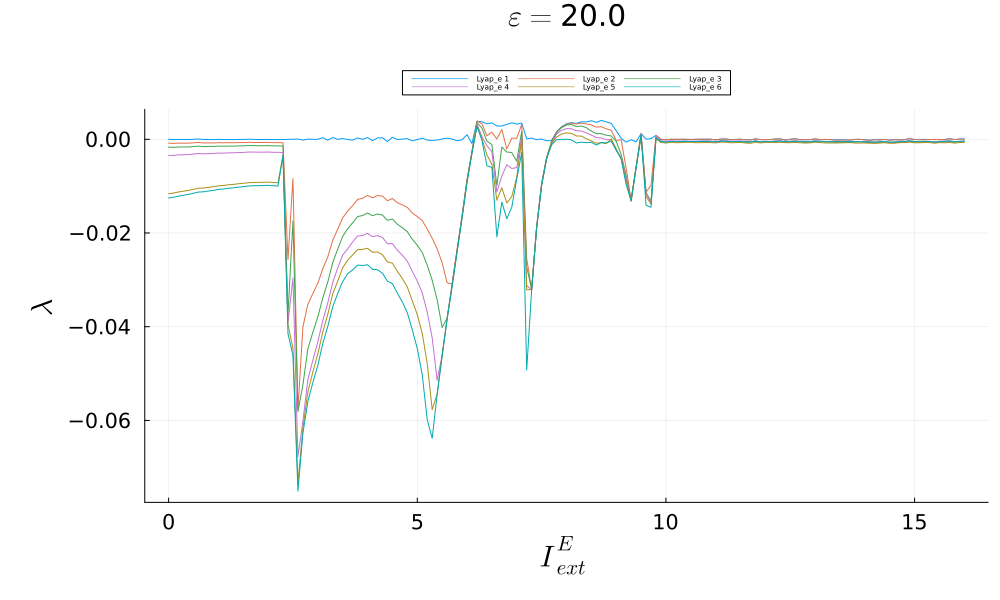

In [90]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    plot!(vectorIext_e20,[matrix20[j][i] for j in 1:length(vectorIext_e20)], label="Lyap_e $i",markersize=3,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(vector_eps20[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"\lambda",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [95]:
tol = 1e-3
modif_matrix20 = deepcopy(matrix20)
for idx_eps=1:length(vector_eps20)
    for idx_Iext_e=1:length(vectorIext_e20)
        for lyap_e =1:90*6
            if abs(matrix20[idx_eps,idx_Iext_e][lyap_e])<tol
                modif_matrix20[idx_eps,idx_Iext_e][lyap_e]=0
            end
        end
    end
end

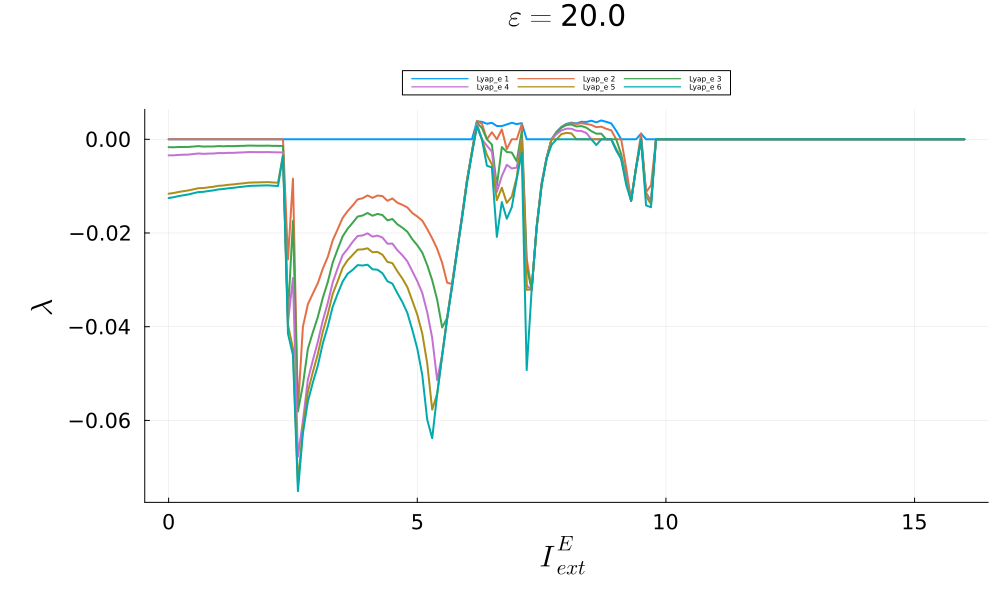

In [96]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    plot!(vectorIext_e20,[modif_matrix20[j][i] for j in 1:length(vectorIext_e20)], label="Lyap_e $i",linewidth=2,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(vector_eps20[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"\lambda",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [97]:
# Extract the first element from each MVector to create a 2D matrix
Lyapunov_1_20 = [modif_matrix20[i, j][1] for i in 1:length(vector_eps20), j in 1:length(vectorIext_e20)]
Lyapunov_2_20 = [modif_matrix20[i, j][2] for i in 1:length(vector_eps20), j in 1:length(vectorIext_e20)]
Lyapunov_3_20 = [modif_matrix20[i, j][3] for i in 1:length(vector_eps20), j in 1:length(vectorIext_e20)]
Lyapunov_4_20 = [modif_matrix20[i, j][4] for i in 1:length(vector_eps20), j in 1:length(vectorIext_e20)]
Lyapunov_5_20 = [modif_matrix20[i, j][5] for i in 1:length(vector_eps20), j in 1:length(vectorIext_e20)]
Lyapunov_6_20 = [modif_matrix20[i, j][6] for i in 1:length(vector_eps20), j in 1:length(vectorIext_e20)]

1×161 Matrix{Float64}:
 -0.0125353  -0.0123707  -0.0121312  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [98]:
# Initialize a matrix to save the classification of the system based on Lyapunov expnents
state_classif_20 = Matrix{Float64}(undef, length(vector_eps20), length(vectorIext_e20))
for idx_eps=1:length(vector_eps20)
    for idx_Iext_e=1:length(vectorIext_e20)
        if Lyapunov_1_20[idx_eps,idx_Iext_e]==0 && Lyapunov_2_20[idx_eps,idx_Iext_e]==0
            # State Classification ==> 3 (Quasiperiodic dynamics)
            state_classif_20[idx_eps,idx_Iext_e] = 3
        elseif Lyapunov_1_20[idx_eps,idx_Iext_e]==0 && Lyapunov_2_20[idx_eps,idx_Iext_e]<0
            # State Classification ==> 2 (Periodic dynamics)
            state_classif_20[idx_eps,idx_Iext_e] = 2
        elseif Lyapunov_1_20[idx_eps,idx_Iext_e]<0 && Lyapunov_2_20[idx_eps,idx_Iext_e]<0
            # State Classification ==> 1 (Fixed point)
            state_classif_20[idx_eps,idx_Iext_e] = 1
        elseif Lyapunov_1_20[idx_eps,idx_Iext_e]>0 && (Lyapunov_2_20[idx_eps,idx_Iext_e]<=0)
            # State Classification ==> 4 (Chaotic dynamics)
            state_classif_20[idx_eps,idx_Iext_e] = 4
        elseif Lyapunov_1_20[idx_eps,idx_Iext_e]>0 && Lyapunov_2_20[idx_eps,idx_Iext_e]>0
            # State Classification ==> 5 (Hyperchaos)
            state_classif_20[idx_eps,idx_Iext_e] = 5
        end
    end
end

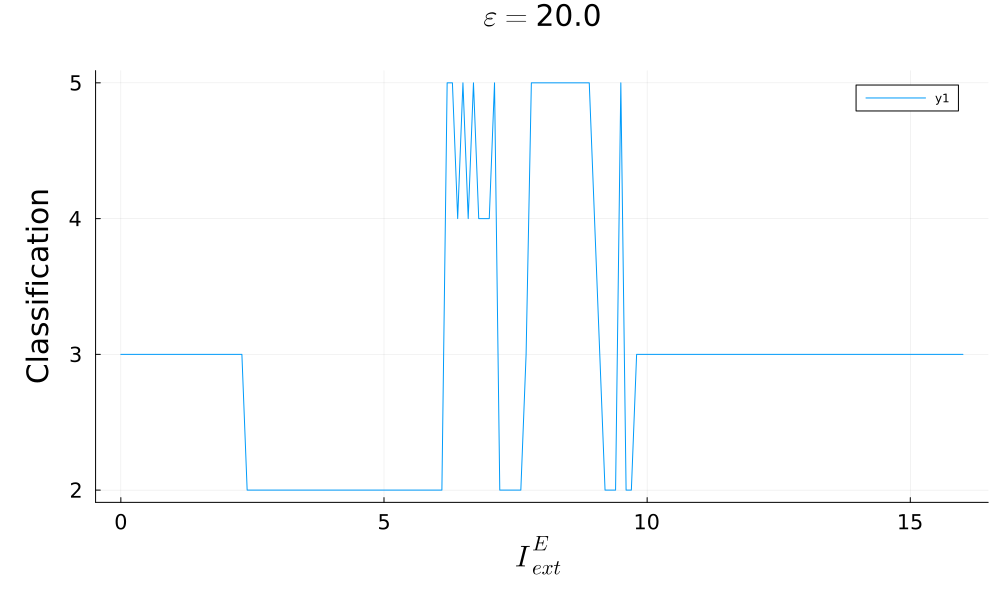

In [99]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
plot!(vectorIext_e20,state_classif_20[1,:],markersize=3,markerstrokewidth=0)

# Set title
plot!(title=L"\epsilon = " * string(vector_eps20[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Classification",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
#plot!(legend=:outertop, legendfontsize=5,legendcolumns=1)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

In [100]:
# Initialize a matrix to save the fractal dimension based on Lyapunov expnents
fractal_dim_20 = Matrix{Float64}(undef, length(vector_eps20), length(vectorIext_e20))
entropy_20 = Matrix{Float64}(undef, length(vector_eps20), length(vectorIext_e20))
for idx_eps=1:length(vector_eps20)
    for idx_Iext_e=1:length(vectorIext_e20)
        if modif_matrix20[idx_eps,idx_Iext_e][1]<0
            fractal_dim_20[idx_eps,idx_Iext_e]=0
        else
            # Compute cumulative sum of LyapunovExponents vector
            cum_sum = cumsum(modif_matrix20[idx_eps,idx_Iext_e])

            # Find index of the first element that is greater than zero in the cumulative sum
            index = findfirst(x -> x < 0, cum_sum)

            # Check if all are negative
            #if index == nothing

            #end

            # Compute numerador in Kaplan-Yorke formula
            num = sum(modif_matrix20[idx_eps,idx_Iext_e][1:index-1])

            # Save entropy_12
            entropy_20[idx_eps,idx_Iext_e] = (index-1)

            # Compute denominator in the Kaplan-Yorke formula
            den = abs(modif_matrix20[idx_eps,idx_Iext_e][index])

            # Save dimension of current pair using Kaplan-Yorke formula
            fractal_dim_20[idx_eps,idx_Iext_e] = (index-1)+num/den
        end

    end
end

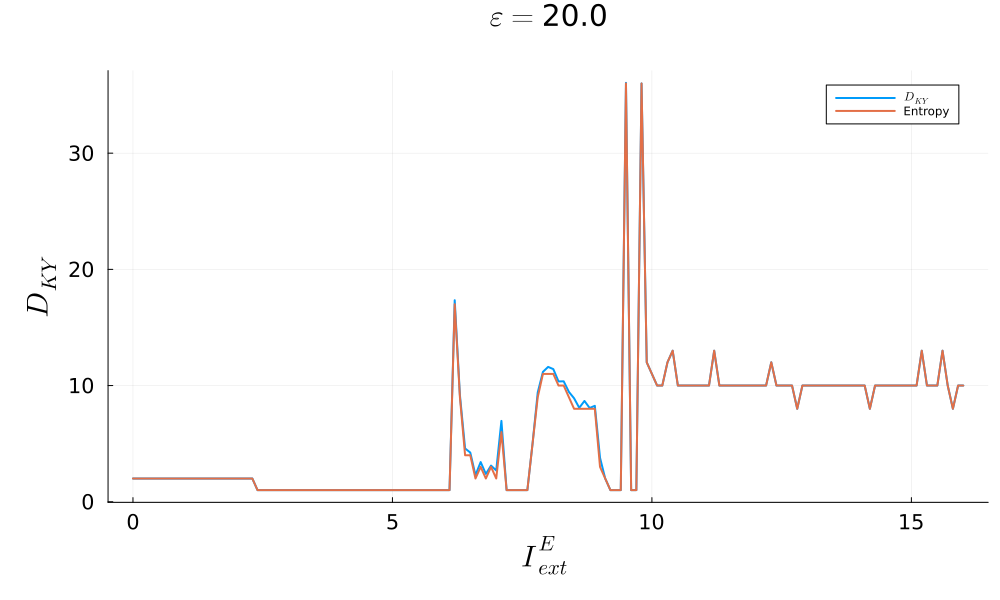

In [101]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
plot!(vectorIext_e20,fractal_dim_20[1,:],label=L"D_{KY}",linewidth=2,markerstrokewidth=0)
plot!(vectorIext_e20,entropy_20[1,:],label="Entropy",linewidth=2,markerstrokewidth=0)
# Set title
plot!(title=L"\epsilon = " * string(vector_eps20[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!(L"D_{KY}",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
#plot!(legend=:outertop, legendfontsize=5,legendcolumns=1)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 